In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [7]:
def generate_data(m,n,filename):
    #setting seed to ensure it's reproducible
    np.random.seed(10)
    A = make_blobs(n_samples=m, n_features=n, centers= k, cluster_std=1.5)
    A = A[0]
    np.savetxt(filename, A, delimiter='\t', fmt='%1f')
    return A

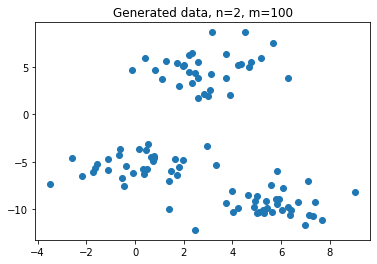

In [8]:
n=2
m=100
k=3
np.random.seed(10)
A = make_blobs(n_samples=m, n_features=n, centers= k, cluster_std=1.5)[0]
plt.figure()
plt.scatter(x=A[:,0],y=A[:,1])
plt.title(f'Generated data, n={n}, m={m}')
plt.show()

In [18]:
import networkx as nx
G = nx.Graph()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 419 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [20]:
import math
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

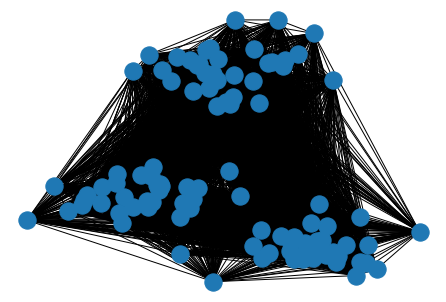

In [21]:
for i in range(0,m):
    G.add_node(i, pos=(A[i][0],A[i][1]))
    for j in range(0,i):
        G.add_edge(i,j)
nx.draw(G, nx.get_node_attributes(G, 'pos'))

In [22]:
def minimum_arc(g,h):
    min_weight = float("inf")
    min_edge = [0,0]
    for a in list(g.nodes):  
        for b in list(h.nodes):
            weight_a_b = distance(A[a],A[b])
            if weight_a_b < min_weight:
                min_weight = weight_a_b 
                min_edge = [a,b]
    return min_edge

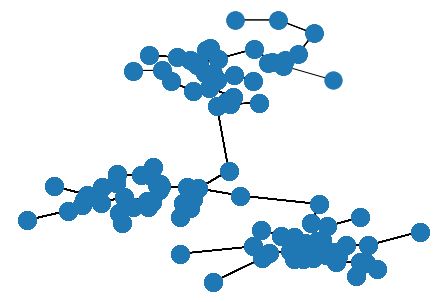

In [40]:
# Now, we use Prim's algorithm

# Initialisation
S = nx.Graph()
S.add_node(0)
N = G.copy()
N_minus_S = G.copy()
N_minus_S.remove_node(0)

for i in range(0,m-1):
    [a,b] = minimum_arc(S,N_minus_S)
    nx.draw(S, nx.get_node_attributes(G, 'pos'))
    S.add_node(b)
    S.add_edge(a,b)
    N_minus_S.remove_node(b)
nx.draw(S, nx.get_node_attributes(G, 'pos'))

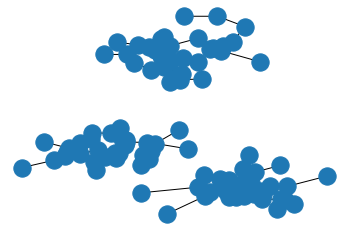

In [41]:
# Let's remove the k-1 arcs with the largest distance
for i in range(0,k-1):
    max_weight = 0
    max_edge = [0,0]
    for edge in list(S.edges):
            weight_a_b = distance(A[edge[0]],A[edge[1]])
            if weight_a_b > max_weight:
                max_weight = weight_a_b
                max_edge = [edge[0],edge[1]]
    S.remove_edge(max_edge[0],max_edge[1])
fig, ax = plt.subplots()
nx.draw(S, nx.get_node_attributes(G, 'pos'))

In [32]:
print(nx.connected_components(S))

<generator object connected_components at 0x7ffa477eb7b0>


In [49]:
with open("spanning_tree_result.txt", 'w') as output_file:
    clusters = [S.subgraph(c) for c in nx.connected_components(S)]
    for cluster in clusters:
        print(cluster.nodes)
        output_file.write(' '.join([str(x) for x in cluster.nodes]))
        output_file.write('\n')

[0, 1, 7, 13, 14, 21, 23, 30, 34, 35, 36, 40, 42, 43, 48, 51, 54, 57, 62, 63, 64, 67, 68, 69, 74, 84, 86, 88, 89, 93, 94, 95]
[3, 6, 9, 10, 16, 18, 20, 24, 29, 33, 41, 45, 46, 47, 49, 52, 53, 55, 58, 59, 65, 66, 71, 77, 78, 79, 80, 82, 87, 90, 91, 92, 97, 98, 99]
[2, 4, 5, 8, 11, 12, 15, 17, 19, 22, 25, 26, 27, 28, 31, 32, 37, 38, 39, 44, 50, 56, 60, 61, 70, 72, 73, 75, 76, 81, 83, 85, 96]
